# Epidemiology I: Deterministic SIR Model Code

<ins>The Deterministic SIR Model</ins>

The deterministic SIR model is given by the following system of ordinary differential equations:

$$
\frac{{\rm d} S}{{\rm d} t}  = - \beta S I, \quad 
\frac{{\rm d} I}{{\rm d} t}  = \beta S I - \mu I, \quad 
\frac{{\rm d} R}{{\rm d} t}  = \mu I.
$$

In these equations, $S$ is the number of susceptible individuals, $I$ is the number of infectious individuals, $R$ is the number of removed individuals (recovered and immune, or dead). $N$ is the total number of individuals, where $N = S+I+R$. By adding the three equations, it can be verified that $\frac{d N}{d t} = 0$, and so $N$ is constant. The variables $\beta$ and $\mu$ are model parameters: $\beta$ is the infection rate parameter, $\mu$ is the removal rate parameter (the reciprocal of the expected time for which an infected individual remains infectious).

As shown in the Epidemiology lecture, the basic reproduction number is given by
$ R_0 = \frac{\beta N}{\mu}. $

The Python code cells below compute numerical solutions to this model by calling the SciPy ODE solver odeint. 

Results are shown for specific parameter values: $ N=10^5$, $\beta = 3 \times 10^{-6}$ and $\mu = 0.1$, corresponding to $R_0 = 3$. The initial conditions are $S(0) = N - 5$, $I(0) = 5$, and $R(0) = 0$. So, we start with only 5 infectious individuals.

In [1]:
# import libraries

import numpy as np # Import NumPy library. The "np" bit tells Python to give NumPy the alias of np. So now we can call np. function_name rather than numpy.
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [6]:
# --- First define the RHS of ODE system --- #

def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 3*(10**-6)
    mu = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

In [7]:
# --- Problem setup --- #

# set up time grid for the solution
tf = 100
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)

# Set initial conditions and put into array y0
S0 = 10**5 - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

In [8]:
# --- Call the ODE solver and extract solutions --- #
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

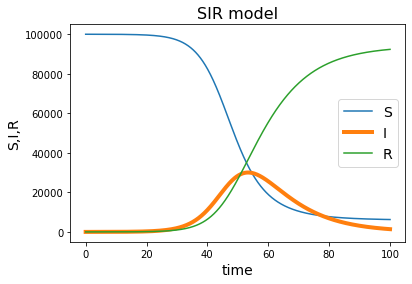

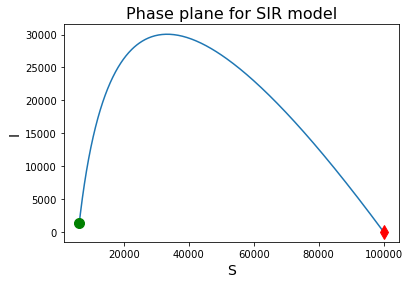

At the end of the simulation, the final values of S, I, and R are (rounded):
S(t=tf) = 6264
I(t=tf) = 1391
R(t=tf) = 92345


In [12]:
# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.plot(t, S, label = "S")
plt.plot(t, I, lw = 4, label = "I")
plt.plot(t, R, label = "R")

# labels etc
plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)
plt.title("SIR model", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I)

# labels etc
plt.xlabel("S", fontsize = 14)
plt.ylabel("I", fontsize = 14)
plt.title("Phase plane for SIR model", fontsize = 16)

# put some markers to show initial and final states
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
plt.show()

# --- Report the final values of S, I, R.  --- #

print("At the end of the simulation, the final values of S, I, and R are (rounded):")
print("S(t=tf) =", round(S[-1]))
print("I(t=tf) =", round(I[-1]))
print("R(t=tf) =", round(R[-1]))